## Decision Tree Classifier

In [26]:
#Importing the libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

### Loading the dataset

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
print("Dataset Shape:", df.shape)
print("Missing Values:", df.isnull().sum())

Dataset Shape: (768, 9)
Missing Values: Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


#### Spliting the dataset into feature(x) and target variable(y)

In [4]:
#Seperating features from the target variable
X= df.drop(['Outcome'], axis=1)
print(X)


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [5]:
print("Feature Columns:", X.columns.tolist())

Feature Columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [6]:
# defining the target variable
y=df.Outcome
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [7]:
print("Class Distribution:\n", y.value_counts(normalize=True))

Class Distribution:
 Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64


### Splitting the data into train and test datasets

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [9]:
print("Training Set Size:", X_train.shape)
print("Test Set Size:", X_test.shape)

Training Set Size: (537, 8)
Test Set Size: (231, 8)


In [10]:
# Initializing a Decision Tree with default Gini criterion
model = DecisionTreeClassifier()

In [11]:
# Mentioning the default parameters
print("Default Parameters:", model.get_params())

Default Parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [12]:
# Training the model on 70% of the data
model = model.fit(X_train, y_train)

In [13]:
print("Training Accuracy:", metrics.accuracy_score(y_train, model.predict(X_train)))

Training Accuracy: 1.0


In [14]:
# Generating predictions on the test set
y_pred = model.predict(X_test)

In [15]:
print("Sample Predictions:", y_pred[:5])

Sample Predictions: [0 0 0 1 0]


In [16]:
# Evaluating model performance on test data
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 70.995670995671


In [17]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[117  29]
 [ 38  47]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.80      0.78       146
           1       0.62      0.55      0.58        85

    accuracy                           0.71       231
   macro avg       0.69      0.68      0.68       231
weighted avg       0.70      0.71      0.71       231



### Model Optimization using Pruning 

In [20]:
dt_optimized = DecisionTreeClassifier(criterion = "entropy", max_depth=3)
dt_optimized = dt_optimized.fit(X_train, y_train)
y_pred = dt_optimized.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test, y_pred))

Accuracy 0.7705627705627706


In [21]:
print("Baseline vs Optimized Accuracy Improvement:", 
      (metrics.accuracy_score(y_test, y_pred) - metrics.accuracy_score(y_test, model.predict(X_test))) * 100)

Baseline vs Optimized Accuracy Improvement: 6.060606060606055


### Visualization 

In [22]:
features = X.columns
features

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [24]:
importances = dt_optimized.feature_importances_
print("Feature Importances:", dict(zip(features, importances)))

Feature Importances: {'Pregnancies': 0.0, 'Glucose': 0.5628369960933173, 'BloodPressure': 0.0, 'SkinThickness': 0.0, 'Insulin': 0.0, 'BMI': 0.3265936616768456, 'DiabetesPedigreeFunction': 0.0, 'Age': 0.11056934222983718}


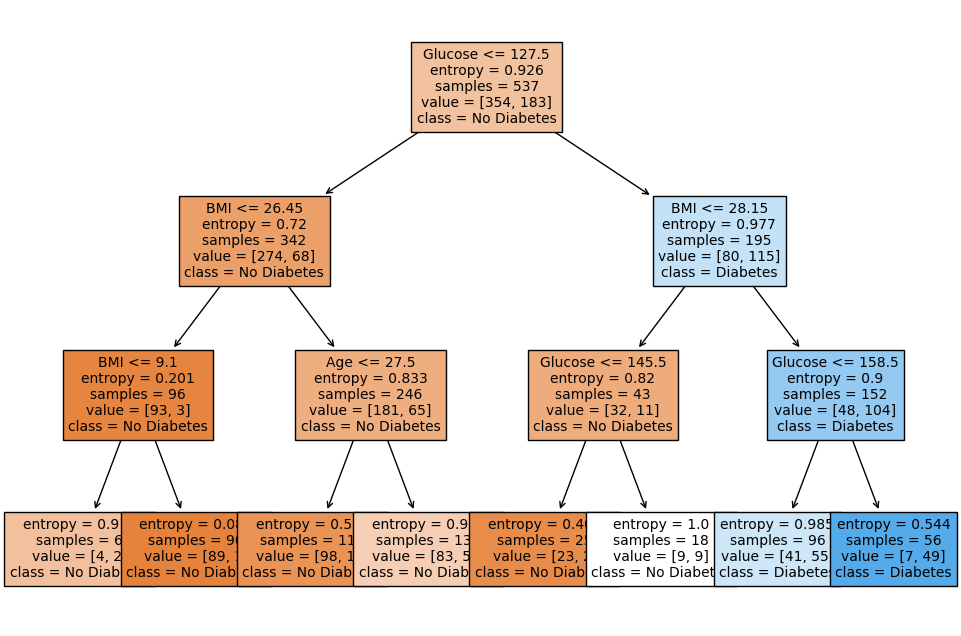

In [25]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

# Convert feature names to a list
plot_tree(dt_optimized, 
          feature_names=list(features),  # Convert to list
          class_names=['No Diabetes', 'Diabetes'], 
          filled=True, fontsize=10)

plt.show()
